Accuracy: 0.8604992657856094
Confusion matrix: [[1045   47]
 [ 143  127]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1092
         1.0       0.73      0.47      0.57       270

    accuracy                           0.86      1362
   macro avg       0.80      0.71      0.74      1362
weighted avg       0.85      0.86      0.85      1362



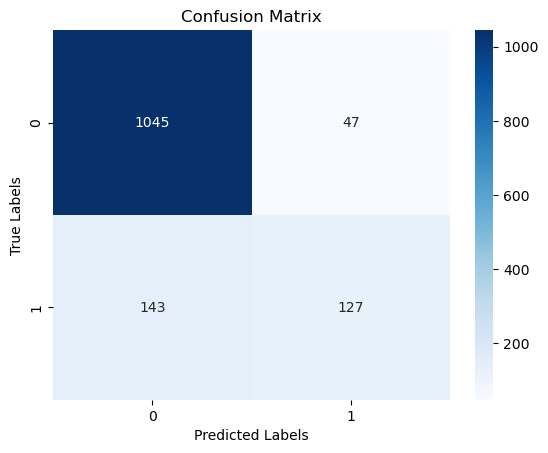

Area under the curve: 0.8766449599782933


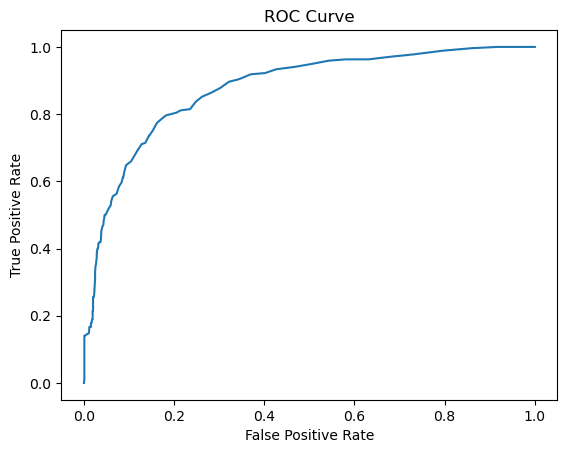

In [4]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import KernelPCA 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:, 2:41]
y = data[:, 41]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KernelPCA transformer with your chosen kernel (e.g., 'rbf' for radial basis function)
kpca = KernelPCA(n_components=10, kernel='rbf')
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Create a RandomForest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rfc.fit(X_train_kpca, y_train)

# Evaluate the model
accuracy = rfc.score(X_test_kpca, y_test)
print("Accuracy:", accuracy)
y_pred = rfc.predict(X_test_kpca)

y_prob = rfc.predict_proba(X_test_kpca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


# Convert confusion matrix to pictorial representation (heatmap)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

auc = roc_auc_score(y_test, y_prob)

print("Area under the curve:", auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Accuracy: 0.8604992657856094
Accuracy: 0.8604992657856094
Confusion matrix:
[[1045   47]
 [ 143  127]]


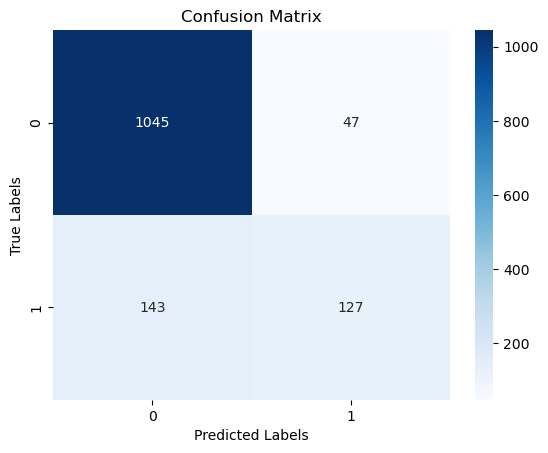

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1092
           1       0.73      0.47      0.57       270

    accuracy                           0.86      1362
   macro avg       0.80      0.71      0.74      1362
weighted avg       0.85      0.86      0.85      1362

Area under the curve: 0.8766449599782933


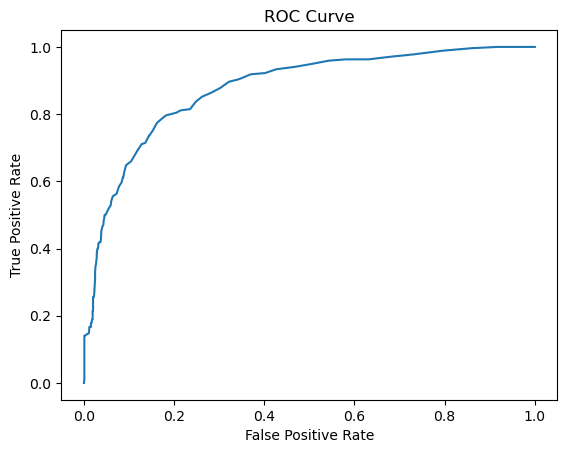

In [2]:
# Kernal PCA

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Separate the features and target
X = data[:, 2:41]
y = data[:, 41].astype(int)  # Ensure the target is integer type

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Kernel PCA for dimensionality reduction
kpca = KernelPCA(kernel='rbf', n_components=10)  # You can choose different kernels
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Create a RandomForest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rfc.fit(X_train_kpca, y_train)

# Evaluate the model
accuracy = rfc.score(X_test_kpca, y_test)
print("Accuracy:", accuracy)
y_pred = rfc.predict(X_test_kpca)

# Evaluate the model for binary classification
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Convert confusion matrix to a pictorial representation (heatmap)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))
y_prob = rfc.predict_proba(X_test_kpca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC AUC
auc = roc_auc_score(y_test, y_prob)
print("Area under the curve:", auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Accuracy: 0.933186490455213
Accuracy: 0.933186490455213
Confusion matrix:
[[1075   17]
 [  74  196]]


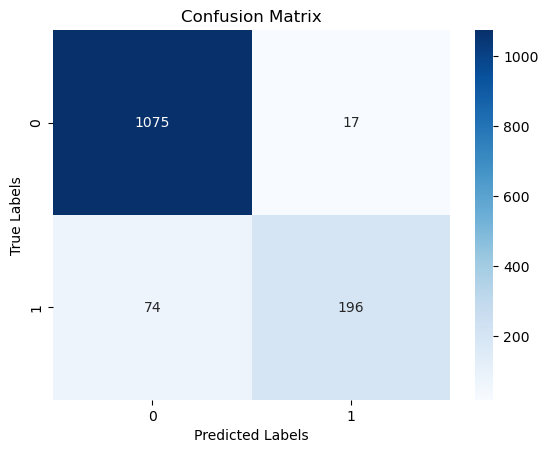

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1092
           1       0.92      0.73      0.81       270

    accuracy                           0.93      1362
   macro avg       0.93      0.86      0.89      1362
weighted avg       0.93      0.93      0.93      1362

Area under the curve: 0.9803639261972595


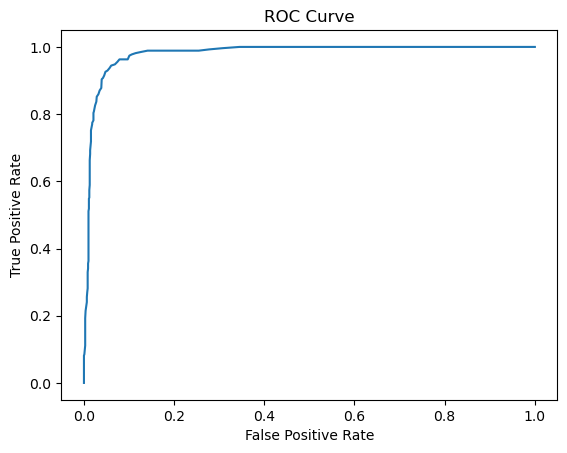

In [1]:
#PCA

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Separate the features and target
X = data[:, 2:41]
y = data[:, 41].astype(int)  # Ensure the target is integer type

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a RandomForest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rfc.fit(X_train, y_train)

# Evaluate the model
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)
y_pred = rfc.predict(X_test)

# Evaluate the model for binary classification
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Convert confusion matrix to a pictorial representation (heatmap)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))
y_prob = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC AUC
auc = roc_auc_score(y_test, y_prob)
print("Area under the curve:", auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
#RFE
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Separate the features and target
X = data[:, 2:41]
y = data[:, 41].astype(int)  # Ensure the target is integer type

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Feature selection using RFE
num_features_to_select = 10  # Specify the number of features to select
rfe = RFE(estimator=rfc, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Fit the model with selected features
rfc.fit(X_train_rfe, y_train)

# Evaluate the model
accuracy = rfc.score(X_test_rfe, y_test)
print("Accuracy:", accuracy)
y_pred = rfc.predict(X_test_rfe)

# Evaluate the model for binary classification
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Convert confusion matrix to a pictorial representation (heatmap)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))
y_prob = rfc.predict_proba(X_test_rfe)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC AUC
auc = roc_auc_score(y_test, y_prob)
print("Area under the curve:", auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()